In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('wheat.csv')

In [3]:
df.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [4]:
df.tail()

,A,P,C,LK,WK,A_Coef,LKG,target
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,2
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,2


In [5]:
df.shape

(210, 8)

In [6]:
df.columns

Index(['A', 'P', 'C', 'LK', 'WK', 'A_Coef', 'LKG', 'target'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
A         210 non-null float64
P         210 non-null float64
C         210 non-null float64
LK        210 non-null float64
WK        210 non-null float64
A_Coef    210 non-null float64
LKG       210 non-null float64
target    210 non-null int64
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


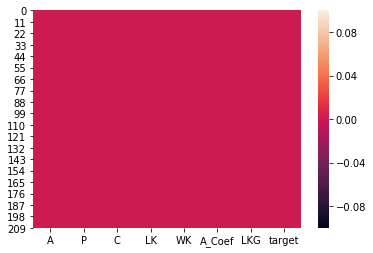

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.describe()

,A,P,C,LK,WK,A_Coef,LKG,target
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,1.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,1.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,2.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,2.000000


<function matplotlib.pyplot.legend(*args, **kwargs)>

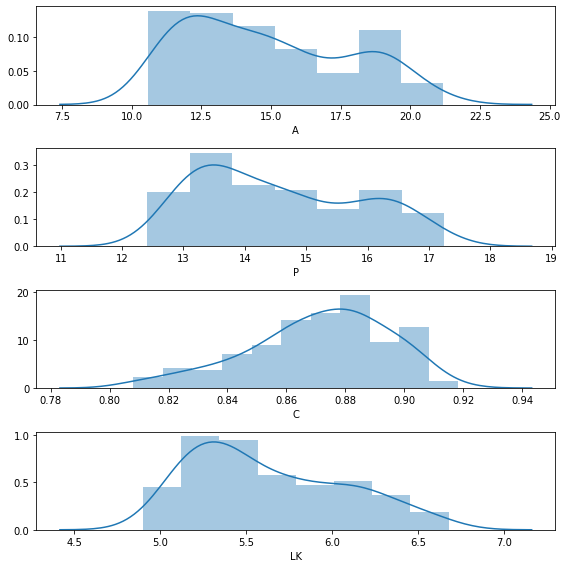

In [10]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(4,1,figsize=(8,8))
sns.distplot(df.A,ax=ax1)
sns.distplot(df.P,ax=ax2)
sns.distplot(df.C,ax=ax3)
sns.distplot(df.LK,ax=ax4)
plt.tight_layout()
plt.legend

In [ ]:
sns.pairplot(df)

In [ ]:
sns.countplot(df.target,palette="pastel")

In [ ]:
sns.boxplot(df)

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [ ]:
df=df.drop('target',axis=1)

In [ ]:
df.sample(5)

In [ ]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,10),wcss,'bx-')
plt.xlabel('No.of Clusters')
plt.ylabel('wcss')
plt.title('Elbow Method')
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
model=KMeans(n_clusters=3,init='k-means++', random_state=42)
model.fit(df)
kmeans_labels=model.labels_

fig=plt.figure(num=None,figsize=(10,6),dpi=80,facecolor='w',edgecolor='k')

ax=plt.axes(projection="3d")
ax.scatter3D(df.A,df.P,df.C,c=kmeans_labels,cmap='rainbow')

xLabel=ax.set_xlabel('A',linespacing=0.5)
yLabel=ax.set_ylabel('P',linespacing=0.5)
zLabel=ax.set_zlabel('C',linespacing=0.5)
print("K-Means")

In [ ]:
import scipy.cluster.hierarchy as sch

In [ ]:
plt.figure(figsize=(10,6))
dendrogram=sch.dendrogram(sch.linkage(df,method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
model=AgglomerativeClustering(n_clusters=4)
model.fit(df)
hac_labels=model.labels_

fig=plt.figure(num=None,figsize=(10,6),dpi=80,facecolor='w',edgecolor='k')

ax=plt.axes(projection="3d")
ax.scatter3D(df.A,df.P,df.C,c=hac_labels,cmap='rainbow')

xLabel=ax.set_xlabel('A',linespacing=0.5)
yLabel=ax.set_ylabel('P',linespacing=0.5)
zLabel=ax.set_zlabel('C',linespacing=0.5)
print("Hierarchical Agglomerative Clustering")

In [ ]:
from sklearn.cluster import DBSCAN
model=DBSCAN()
model.fit(df)
dbs_labels=model.labels_


fig=plt.figure(num=None,figsize=(10,6),dpi=80,facecolor='w',edgecolor='k')

ax=plt.axes(projection="3d")
ax.scatter3D(df.A,df.P,df.C,c=dbs_labels,cmap='rainbow')

xLabel=ax.set_xlabel('A',linespacing=0.5)
yLabel=ax.set_ylabel('P',linespacing=0.5)
zLabel=ax.set_zlabel('C',linespacing=0.5)
print("DBSCAN")